In [1]:
import pandas as pd


df = pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')
df


,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


Data Cleaning 

In [23]:
# Check for missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates

# Standardize text fields 
df['Product_Category'] = df['Product_Category'].str.strip().str.upper()


df


,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Category Hierarchical
0,01-01-2023,SPORTS,932.80,35.82,Occasional,6780.38,32,Occas
1,02-01-2023,TOYS,569.48,3.60,Premium,6807.56,16,Prem
2,03-01-2023,HOME DECOR,699.68,3.56,Premium,3793.91,27,Prem
3,04-01-2023,TOYS,923.27,0.61,Premium,9422.75,29,Prem
4,05-01-2023,TOYS,710.17,47.83,Premium,1756.83,17,Prem
...,...,...,...,...,...,...,...,...
995,22-09-2025,FASHION,740.06,49.06,Regular,1890.83,34,Reg
996,23-09-2025,ELECTRONICS,517.10,28.48,Premium,8011.66,21,Prem
997,24-09-2025,ELECTRONICS,683.43,12.98,Occasional,3408.51,19,Occas
998,25-09-2025,SPORTS,51.26,21.85,Occasional,7335.62,26,Occas


Data Transformation 

In [15]:
# Example of creating hierarchical categories based on customer segment
def Customer_Segment(name):
    if 'Occasional' in name:
        return 'Occas'
    elif 'Premium' in name:
        return 'Prem'
    elif 'Regular' in name:
        return 'Reg'
    
df['Category Hierarchical'] = df['Customer_Segment'].apply(Customer_Segment)

# Show the transformed data
print(df[['Customer_Segment', 'Category Hierarchical']].head())


  Customer_Segment Category Hierarchical
0       Occasional                 Occas
1          Premium                  Prem
2          Premium                  Prem
3          Premium                  Prem
4          Premium                  Prem


Data Analysis 

In [16]:
# Group by hierarchical category and calculate the average price
category_avg_price = df.groupby('Category Hierarchical')['Price'].mean().sort_values(ascending=False)

# Show the result
print(category_avg_price)


Category Hierarchical
Occas    525.356254
Reg      498.487101
Prem     491.038291
Name: Price, dtype: float64


Data Visualization 

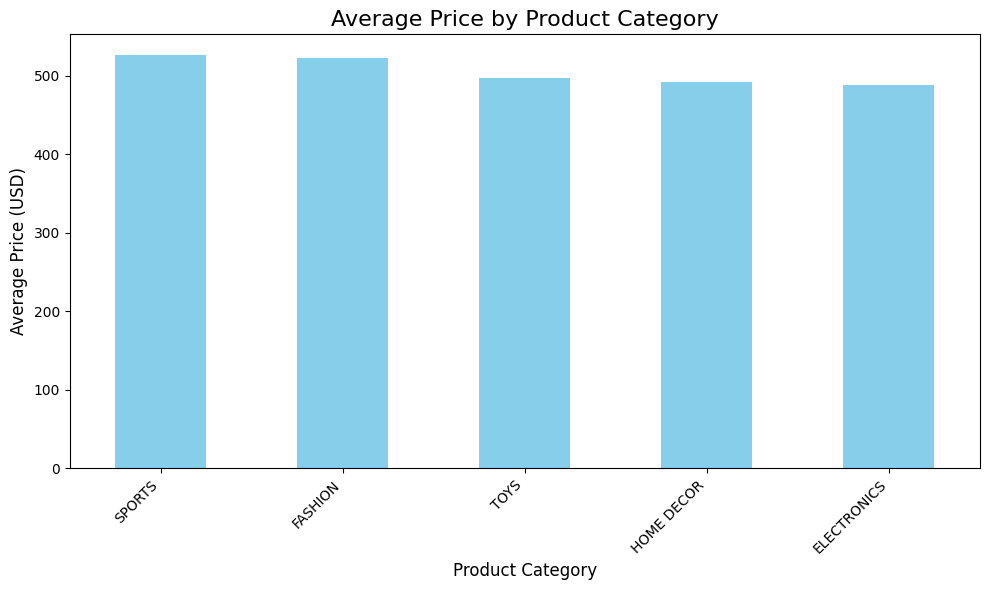

In [ ]:
import matplotlib.pyplot as plt 
category_avg_price = df.groupby('Product_Category')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_avg_price.plot(kind='bar', color='skyblue')

plt.title('Average Price by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()
